# Neural Network from Scratch

In this Notebook, I will be implementing a basic neural network from scratch. 

<img src="https://repository-images.githubusercontent.com/445114280/74230da9-ecfc-4fb6-ac2e-ae52e3f811ce" style="width:270px;height:237px;">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
#Fetches MNIST dataset and splits data into testing and training sets
def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

#Fetching code taken from https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb

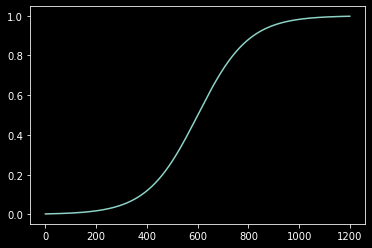

In [3]:
# define sigmoid activation function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

# define ReLU activation function
def ReLU(x):
    return max(0, x)

plt.plot(sigmoid(np.arange(-6, 6, 0.01)))

In [4]:
class NN:
    def __init__(self):
        self.input_layers = 784
        self.hidden_layer1 = 128
        self.hidden_layer2 = 64
        self.output_layer = 10
        
        self.W1 = np.random.randn(self.hidden_layer1,
                                 self.input_layers)
        
        self.W2 = np.random.randn(self.hidden_layer2,
                                 self.hidden_layer1)
        
        self.W3 = np.random.randn(self.output_layer,
                                 self.hidden_layer2) 
        
    def forward(self, X):
        X = sigmoid(self.W1 @ X) 
        X = sigmoid(self.W2 @ X)  
        X = sigmoid(self.W3 @ X)  
        return X
        

In [8]:
#Reshape Data
X_train = X_train.reshape(28*28, 60000)

Model = NN()
output = Model.forward(X_train).T

print(np.argmax(output[0]))

3


<ipython-input-3-9ea95a724203>:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


In [9]:
for i in range(100):
    if Model.forward(X_test).T[0] == Y_test[0]:
        print(Y_test[0])
    else:
        Model.w1 = np.random.randn(Model.hidden_layer1,
                                 Model.input_layers)
        Model.w2 = np.random.randn(Model.hidden_layer2,
                                 Model.hidden_layer1)
        Model.w2 = np.random.randn(Model.output_layer,
                                 Model.hidden_layer2) 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 784)